# MNIST

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df1=pd.read_csv("mnist_train.csv")

In [6]:
df1.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y=np.array(df1['label'])
x=np.array(df1.drop(columns='label'))

In [8]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
x[0].shape

(784,)

In [10]:
y

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

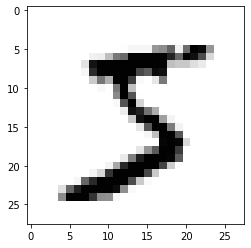

In [170]:

for i in range(1):
    img = x[i].reshape((28,28))
    plt.imshow(img,cmap='Greys')
    plt.show()

In [12]:
x[0].shape

(784,)

In [13]:
x_n=x/255
x_n

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

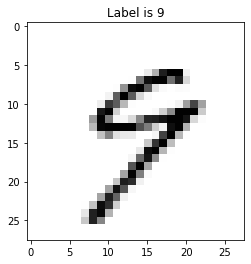

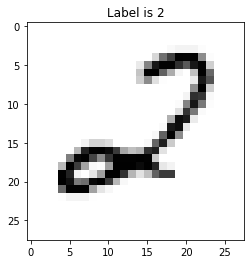

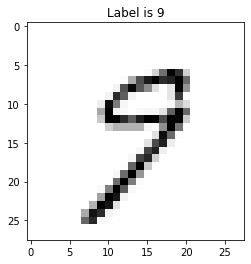

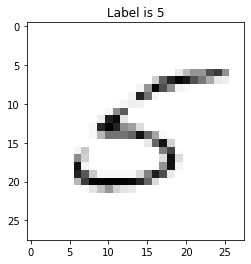

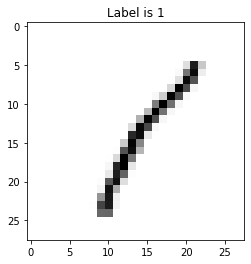

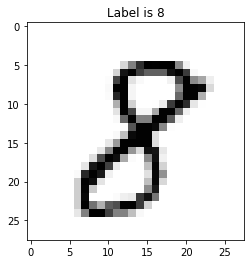

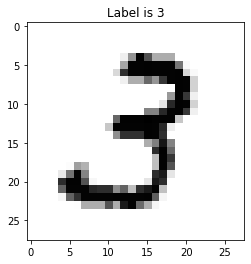

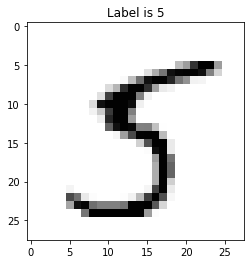

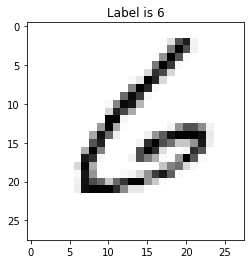

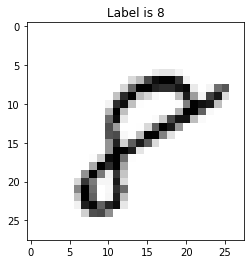

In [171]:
for i in range(59990,60000):
    img=x_n[i].reshape(28,28)
    plt.title('Label is {label}'.format(label=y[i]))
    plt.imshow(img,cmap='Greys')
    plt.show()

# SVM

In [15]:
from sklearn import svm

In [16]:
clf = svm.SVC()
clf.fit(x_n, y)

SVC()

In [19]:
df_test=pd.read_csv("mnist_test.csv")

In [20]:
df_test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
x_test=np.array(df_test.drop(columns='label'))/255
y_test=np.array(df_test['label'])

In [35]:
x_test.max()

1.0

In [36]:
y_pred=clf.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score

In [41]:
print("Accuracy:",accuracy_score(y_pred,y_test)*100,"%")

Accuracy: 97.92 %


In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
confusion_matrix(y_pred,y_test)

array([[ 973,    0,    6,    0,    0,    2,    6,    0,    3,    3],
       [   0, 1126,    1,    0,    0,    0,    2,    6,    0,    4],
       [   1,    3, 1006,    2,    5,    0,    0,   11,    2,    1],
       [   0,    1,    2,  995,    0,    9,    0,    1,    6,    7],
       [   0,    0,    1,    0,  961,    0,    2,    1,    3,   10],
       [   2,    1,    0,    2,    0,  871,    3,    0,    2,    2],
       [   1,    1,    2,    0,    3,    4,  944,    0,    2,    1],
       [   1,    1,    7,    5,    0,    1,    0,  996,    3,    7],
       [   2,    2,    6,    5,    2,    4,    1,    2,  950,    4],
       [   0,    0,    1,    1,   11,    1,    0,   11,    3,  970]],
      dtype=int64)

# Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
clf_rf=RandomForestClassifier()
clf_rf.fit(x_n,y)

RandomForestClassifier()

In [47]:
y_pred_rf=clf_rf.predict(x_test)

In [49]:
print("Accuracy:",accuracy_score(y_test,y_pred_rf)*100,"%")

Accuracy: 96.96000000000001 %


In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
clf_dt=DecisionTreeClassifier()
clf_dt.fit(x_n,y)

DecisionTreeClassifier()

In [52]:
y_pred_dt=clf_dt.predict(x_test)

In [53]:
accuracy_score(y_pred_dt,y_test)

0.8802

# CNN

In [143]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,Flatten,MaxPooling2D
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import ReLU,LeakyReLU
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [144]:
x_n_cnn=x_n.reshape(x_n.shape[0],28,28,1)
x_test_cnn=x_test.reshape(x_test.shape[0],28,28,1)

In [145]:
model= Sequential()

In [147]:
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [150]:
#Compile model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [151]:
model_history=model.fit(x_n_cnn,y,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2106 - accuracy: 0.9354
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0850 - accuracy: 0.9739
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0603 - accuracy: 0.9817
Epoch 4/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0452 - accuracy: 0.9856
Epoch 5/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0356 - accuracy: 0.9885
Epoch 6/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0306 - accuracy: 0.9897
Epoch 7/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0269 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0227 - accuracy: 0.9921
Epoch 9/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0213 - accuracy: 0.9928
Epoch 10/10
1875/1875 [==============================] - 31s 16m

In [152]:
y_pred_cnn=model.predict(x_test_cnn)

In [158]:
model.evaluate(x_test_cnn,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0607 - accuracy: 0.9857


[0.06073298305273056, 0.9857000112533569]

9

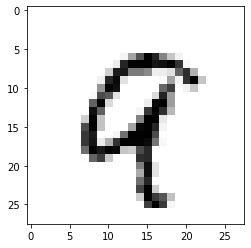

In [167]:
image_index = 3001
plt.imshow(x_test_cnn[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test_cnn[image_index].reshape(1, 28, 28, 1))
pred.argmax()